# SNLP Assignment 5

Name 1: Rayyan Mohammad Minhaj<br/>
Student id 1: 7074982<br/>
Email 1: rami00002@stud.uni-saarland.de<br/>


Name 2: Abdullah Abdul Wahid <br/>
Student id 2: 7075730 <br/>
Email 2: abyy00002@stud.uni-saarland.de<br/> 

Name 3: <br/>
Student id 3: <br/>
Email 3: <br/> 

**Instructions:** Read each question carefully. <br/>
Make sure you appropriately comment your code wherever required. Your final submission should contain the completed Notebook. There is no need to submit the data files. <br/>
Upload the zipped folder on CMS. Please follow the naming convention of **Name1_studentID1_Name2_studentID2_Name3_studentID3.zip**. Make sure to click on "Turn-in" (or the equivalent on CMS) after you upload your submission, otherwise the assignment will not be considered as submitted. Only one member of the group should make the submisssion.

---

## Exercise 1 - Back Off! Probabilities Again! (3 points)

Consider the toy corpus:

>    I study SNLP\
>    study SNLP I\
>    I like to study SNLP\
>    I study SNLP

a. State the Vocabulary of the corpus and unigram counts. What is the bigram probability for the sequence "I like SNLP" using add-epsilon-discounting with ε = 0.5? (0.75 points)

b. Now use a back-off bigram model with absolute discounting (use d=0.75) and a back-off to smoothed unigrams (with the same epsilon ε = 0.5) (0.75 points)

c. Compare the result from both techniques. (0.5 points)

d. To actually estimate these n-gram probabilities over a text corpus, we use **Maximum Likelihood Estimation (MLE)**. The estimate for the parameters of the MLE is obtained by getting counts from the corpus and then normalising them so they lie between 0 and 1. Consider the formula from the slides. 

$$P(w_2 | w_1) = \frac{P(w_1,w_2)}{P(w_1)}$$

Using this, state the empirical formula for finding the conditional probability of unigrams $P(w)$, bigrams $P(w_2|w_1)$, and trigrams $P(w_3|w_1,w_2)$ for a corpus of N words. We do not expect any mathematical proof here, but just the formula for finding the conditional probabilities from the words in the corpus using the shown equation as the starting point. (0.5 points)

e. Using MLE, compute the probabilities for the following (assume we lowercase the corpus):  (0.5 points)\
(i) $p(snlp|study)$ \
(ii) $p(snlp|i \ study)$

---

# Answers - Exercise 1
(a) The Vocabulary "V" (all unique words) is: V={"I", "study", "SNLP", "like", "to"} <br/>
The Unigram counts for each word is: <br/>
* "I" - 4
* "study" - 4
* "SNLP" - 4
* "like" - 1
* "to" - 1

Then we need to get ALL possible bigrams:<br>
* I study SNLP → Bigrams: (I, study), (study, SNLP)
* study SNLP I → Bigrams: (study, SNLP), (SNLP, I)
* I like to study SNLP → Bigrams: (I, like), (like, to), (to, study), (study, SNLP)
* I study SNLP → Bigrams: (I, study), (study, SNLP)


We want to compute bigram P("I like SNLP") <br/>
We can break down P( "I like SNLP" ) = P( "like" | "I" ) x P( "SNLP" | "like" )<br/>
We use the formula:
$$P(w_i | w_{i-1}) = \frac{C(w_{i-1},w_i)+epsilon}{P(w_{i-1}) + epsilon*vocabulary size}$$
the numerator is the count of times (I, like) occurs, and denominator is count of how many times ("I", "WHATEVER") occurs
For $$P( "like" | "I" ) = \frac{1+0.5}{3+(0.5)(5)} = 0.273$$
For $$P( "SNLP" | "like" ) = \frac{0+0.5}{1+(0.5)(5)} = 0.143$$
Therefore, 
$$P( "I like SNLP" ) = P( "like" | "I" ) x P( "SNLP" | "like" ) = 0.273 * 0.143 = 0.039$$


<br/>
<br/>

(b) For abs discounting we use these formulas:
$$ P(w_2|w1) = \frac{C(w_1,w_2)-d}{C(w_1)} + \alpha(w_1)*P_{unigram}(w_2) $$
And if the bigram is unseen (its count is 0), then:
$$ P(w_2|w_1) = \alpha(w_1)*P_{unigram}(w_2) $$
Now in a similar fashion, we will calculate P( "like" | "I" ) and P( "SNLP" | "like" )
For $$P( "like" | "I" ) = \frac{1-0.75}{3} + \alpha("I")*P_{unigram}("like")$$
But wait, we dont have $\alpha$ yet. We can calculate it using the following formula:
$$\alpha(w)=\frac{d.R(w)}{C(w)} = \alpha("I")=\frac{0.75*2}{3} = 0.5$$
SIDE NOTE: R(w) is basically the *distinct* counts thats why its 2, and the denominator is count of how many bigrams start with "I". <br/>
We also need smoothed $P_{unigram}("like")$
$$P_{unigram}("like") = \frac{1+0.5}{14+0.5*5}=0.091$$

Now back to
$$P( "like" | "I" ) = \frac{1-0.75}{3} + 0.5*0.091=0.129$$

And for P( "SNLP" | "like" ), since it dosent exist, we use:
$$P( "SNLP" | "like" ) = \alpha("like")*P_{unigram}("SNLP")$$
Im calculating the values behind the scenes,
$$P( "SNLP" | "like" ) = 0.75*0.273 = 0.204$$

And so finally,
$$P("IlikeSNLP")=P(like∣I)⋅P(SNLP∣like) = 0.129 x 0.204 = 0.0263$$

<br/>

(c) The epsilon smoothing gives a higher probability because it over-smooths, giving even unseen bigrams events a non-negligible probability. Backing off is more accurate because it discounts seen bigrams realistically,and backs off to a more reasonable smoothed unigram distribution (rather than distributing probability mass evenly across ALL bigrams).
<br/>

(d) Unigram Probability:
$$P(w) = \frac{C(w)}{N}$$

Bigram Probability:
$$P(w_2|w_1) = \frac{C(w_1,w_2)}{C(w_1)}$$

Trigram Probability:
$$P(w_3|w_1, w_2) = \frac{C(w_1,w_2,w_3)}{C(w_1,w_2)}$$

(e)(i) P("snlp" | "study")
$$P("snlp" | "study") = \frac{C("study \ snlp")}{C("study")} = \frac{4}{4} = 1$$

(e)(ii) P("snlp" | "i", "study")
$$P("snlp" | "i", "study") = \frac{C("i \ study \ snlp")}{C("i study")} = \frac{2}{2} = 1$$




---

## Exercise 2 - Good Turing Smoothing (2 points)

Consider the following 2 tables

<table style="display: inline-block; margin-right: 50px;">
  <caption><strong>Good-Turing Count-of-Counts</strong></caption>
  <thead>
    <tr><th>Count (N(w,h))</th><th>Count of Counts (n_N(w,h))</th></tr>
  </thead>
  <tbody>
    <tr><td>1</td><td>5000</td></tr>
    <tr><td>2</td><td>1600</td></tr>
    <tr><td>3</td><td>1000</td></tr>
    <tr><td>4</td><td>600</td></tr>
    <tr><td>5</td><td>300</td></tr>
  </tbody>
</table>

<table style="display: inline-block;">
  <caption><strong>Bigrams with History "wine"</strong></caption>
  <thead>
    <tr><th>Count (N(w,h))</th><th>Bigram</th></tr>
  </thead>
  <tbody>
    <tr><td>1</td><td>wine drinker</td></tr>
    <tr><td>2</td><td>wine lover</td></tr>
    <tr><td>3</td><td>wine glass</td></tr>
  </tbody>
</table>


a. What are the discounted counts under Good–Turing discounting for the three given bigrams?

b. The amounts from discounting counts are given to a back-off unigram model. Using such a back-off model, what are the
probabilities for the following bigrams?\
(i) $p(drinker|wine)$\
(ii) $p(glass|wine)$\
(iii) $p(mug|wine)$\
Note: $p(mug) = 0.015$, $p(drinker)=0.015$, $p(glass)=0.01$ . State any assumptions that you make.

---

# Answers - Exercise 2

(a) Good-Turing discounted count has the formula:
$$N*=\frac{(r+1)*n_{r+1}}{n_r}$$
where, 
* r: observed count of the bigram (e.g., 1, 2, 3)
* $n_r$ : number of bigrams with count 
* $n_{r+1}$ : number of bigrams with count r+1
* N∗ : discounted count

For 1. wine drinker (r=1)
$$N*=\frac{(1+1)*n_2}{n_1} =\frac{(1+1)*1600}{5000} = 0.64$$
For 2. wine lover (r=2)
$$N*=\frac{(2+1)*n_3}{n_2} =\frac{(2+1)*1000}{1600} = 1.89$$
For 3. wine glass (r=3)
$$N*=\frac{(3+1)*n_4}{n_4} =\frac{(3+1)*600}{1000} = 2.40$$

<br/>

(b) Lets assume counts are normalized over the total discounted counts for "wine". We can then normalize each discounted count by this total to get actual bigram probabilities.<br/>
So the total discounted count for history "wine" is:
$$0.64+1.89+2.40=4.93$$
Now we can normalize (at least for those bigrams that are seen)<br/>
(i) p( drinker | wine ) = 0.64/4.93 = 0.129<br/>
(ii) p( glass | wine ) = 2.40/4.93 = 0.487<br/>

(iii) Because of our assumption, we can say that ALL MASS has been assigned to seen bigrams (4.93/4.93) = 1. <br/>
However, Good-Turing discounting assumes that some mass should be left for unseen events. But since we are using discounted counts, not raw counts, we should normalize over the original total count, not the discounted one. Let's assume the original total count (before discounting) is:
$$1(drinker)+2(lover)+3(glass) = 6$$
Then:
$$Total discounted mass=0.64+1.875+2.4=4.915$$
$$Leftover mass=6−4.915=1.085$$

So, leftover probability mass:

$$\alpha = \frac{1.085}{6} = 0.1808$$
This leftover mass is distributed among UNSEEN BIGRAMS using smoothed unigram probabilities. <br/>
(iii) p( mug | wine ) <br/>
To simplify, assume mug is the only unseen continuation under wine (or normalize later if more are known).
$$p(mug|wine)=\alpha * \frac{p(mug)}{Z}$$

Where Z is the total unigram mass of all unseen continuations.
Assuming only mug is unseen (as stated):
$$Z=p(mug)=0.015$$
$$p(mug|wine)=0.1808 * \frac{0.015}{0.015}=0.1808$$


## Exercise 3: Cross-Validation (5 points)


Imagine you are a linguist in the remote future who just rediscovered a book called "Bible". To your disappointment the book is obviously incomplete; all the pages between Genesis and the Apocalypse are torn out, maybe by some late Christian cult. Since you don't know the language of the book you want to build a first language model that you can use if you find any of the lost parts. You digitize the book with your state-of-the art portable digitizer, and then load it into one of your Python notebooks.

### 3.1 Baseline

* The two corpora are in the text files `genesis.txt` and `apocalypsis.txt`. Load them into the notebook, preprocess them by removing all non-alphabetical characters, and then concatenate them into a single corpus. Split the corpus into a train and a test set, with the test set comprising the _last_ 20% of the corpus. The functions for `preprocess` and `train_test_split_data` should be implemented in `exercise_3.py` (0.5 points)

In [ ]:
# Load data
from importlib import reload
from pathlib import Path

import exercise_3
exercise_3 = reload(exercise_3)

with open('data/genesis.txt', 'r', encoding='utf-8') as file:
    genesis_lines = file.readlines()

with open('data/apocalypsis.txt', 'r', encoding='utf-8') as file:
    apocalypsis_lines = file.readlines()

genesis_text = genesis_lines
apocalypsis_text = apocalypsis_lines

# preprocess
genesis_preprocessed = exercise_3.preprocess(genesis_text)
apocalypsis_preprocessd = exercise_3.preprocess(apocalypsis_text)

# concatenate
corpus = genesis_preprocessed + apocalypsis_preprocessd
#print(corpus)

# train, test split
train, test = exercise_3.train_test_split_data(corpus)

* Using the language model class given, we will estimate a trigram language model on the train set and report perplexity on the test set. First, implement the `perplexity` function in `language_model.py` then calculate it using $\alpha=1$. Does this represent an unbiased estimate of the model's capacity? (1 points)

In [65]:
# TODO: trigram LM
from importlib import reload
#from language_model import NGramLM
import language_model
language_model = reload(language_model)


N = 3 #trigram
alpha = 1.0

LM = language_model.NGramLM(train, N, alpha)

perplexity = LM.perplexity(test)
print(perplexity)

2509.9120526977413


### 3.2 Average Perplexity

* Since you want to get an unbiased estimate of your model's capacity, you decide to apply k-fold cross-validation on your corpus. To do this, implement the function `k_validation_folds` in `exercise_3.py`. Use it to split your corpus into $k=5$ cross-validation folds, and make sure that the folds are of the same size. (1 point)

* Now, estimate a trigram language model on each of the CV folds. Use the `NGramLM` class, and average over all perplexity scores. Does the average score differ from the one obtained in 3.2, and why? (1 point)

In [ ]:
exercise_3 = reload(exercise_3)
import language_model
language_model = reload(language_model)



# 10-fold cross-validation
cv_folds = exercise_3.k_validation_folds(corpus, k_folds=5) #the comment says 10 but this was placed as 5
#print(cv_folds)

pps = []

# TODO: estimate 10 trigram LMs!
k_folds = 5 #makign this into a variable because the comments and questions are contradicting :/
for i in range(k_folds):
    #train and test split
    test_fold = cv_folds[i]
    train_folds = cv_folds[:i] + cv_folds[i+1:]
    train_corpus = [token for fold in train_folds for token in fold]
    
    #train trigram model again
    model = language_model.NGramLM(train_corpus, N=3, alpha=0.1)  # example smoothing alpha
    
    #calculate perplexity on test fold
    pp = model.perplexity(test_fold)
    pps.append(pp)

# Average perplexity over folds
average_pp = sum(pps) / len(pps)
print(f"Average 5-fold CV perplexity: {average_pp}")

Average 5-fold CV perplexity: 1223.9571967405884


Each fold uses a different test set and train set, so the model is trained on slightly different data each time, which affects the perplexity in a good way, and we can see the perplexity decreasing as well. Averaging over folds reduces variance and gives a more unbiased and robust estimate than a single train/test split.

### 3.3 Hyperparameter Tuning

* As you don't know anything about the language the book is written in, you have to find the best hyperparemter $\alpha$ for your model by a brute-force search. Since you know from 3.2 that your data is not balanced, you decide to use only the averaged perplexity score (derived from $k=10$ CV folds) for this. Do so by completing the loop in the code cell below. Then, plot the obtained perplexity scores vs. $\alpha$. Implement the function `plot_pp_vs_alpha` in `exercise_3.py` for this. (1 point)

**Hint:** This could take a while.

In [71]:
# hyperparamter tuning, CV for trigram
alphas = [x*0.01 for x in range(1,101)]

* Repeat the tuning process for unigram and bigram language models. Does your estimate of $\alpha$ differ? Why? (0.5 points)

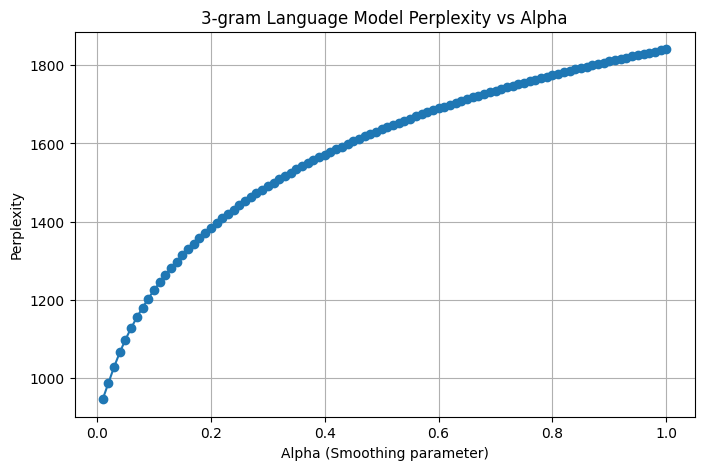

In [73]:
# hyperparamter tuning, unigram + bigram
language_model = reload(language_model)
exercise_3 = reload(exercise_3)


pps = []

for alpha in alphas:
  # TODO: estimate LMs!
  fold_pps = []
  for i in range(k_folds):



    test_fold = cv_folds[i]
    train_folds = cv_folds[:i] + cv_folds[i+1:]
    train_corpus = [token for fold in train_folds for token in fold]

    #train trigram LM with smoothing alpha
    model = language_model.NGramLM(train_corpus, N=3, alpha=alpha)
    pp = model.perplexity(test_fold)
    fold_pps.append(pp)
  
  avg_pp = sum(fold_pps) / k_folds
  pps.append(avg_pp)

# TODO: plot!

exercise_3.plot_pp_vs_alpha(pps, alphas, N=3)


--- 

## Bonus Question (2 points)

Read the Research Paper, [Tokenization and the Noiseless Channel](https://arxiv.org/pdf/2306.16842) . The author proposes a new way to evaluate tokenization techniques in NLP using information theory. Specifically, the author introduces the concept of "channel efficiency" which measures the information in a model, received from the tokenizer, via Rényi entropy. The authors find that a Rényi entropy with α = 2.5 correlates strongly (0.78) with BLEU scores in machine translation tasks, outperforming traditional metrics like compressed length.


Discuss the reasoning behind using Rényi entropy as an evaluator of tokenization efficiency, over Shannon entropy. Furthermore, discuss the implications of this finding for the design of tokenizers in NLP pipelines, particularly in tasks like machine translation.

---

The paper "Tokenization and the Noiseless Channel" by Zouhar et al. introduces an innovative approach to evaluating tokenization techniques in natural language processing (NLP) using information theory. Specifically, the authors propose the concept of "channel efficiency," measured via Rényi entropy, to assess how effectively a tokenizer conveys information to a model. Their findings indicate that a Rényi entropy with α = 2.5 correlates strongly (0.78) with BLEU scores in machine translation tasks, outperforming traditional metrics like compressed length.

Why Use Rényi Entropy Over Shannon Entropy?

Shannon entropy (α = 1) measures the average information content in a distribution, emphasizing the most probable events. While useful, it can assign extremely long codes to low-frequency tokens and very short codes to high-frequency tokens, potentially leading to inefficiencies in token representation.

Rényi entropy generalizes Shannon entropy by introducing an order parameter α, allowing for different sensitivities to the distribution's tail. At α = 2.5, Rényi entropy penalizes distributions with either very high or very low-frequency tokens. This balance discourages tokenizations that overemphasize either end of the frequency spectrum, promoting a more uniform distribution that can be more effective for model learning.

Implications for Tokenizer Design in NLP Pipelines

The strong correlation between Rényi entropy (α = 2.5) and BLEU scores suggests that tokenizers producing balanced token frequency distributions can enhance model performance in machine translation tasks. This insight can guide the development of tokenization strategies that avoid over-representing common tokens or under-representing rare ones, leading to more efficient and effective NLP models .

However, it's important to note that while Rényi entropy provides valuable insights, it is not a definitive predictor of model performance. Subsequent studies have identified scenarios where increasing Rényi efficiency does not correspond to improved downstream performance. For instance, modifications like Random-Drop BPE and Duplication BPE can artificially inflate Rényi efficiency while degrading model quality.

Therefore, while Rényi entropy is a useful tool for evaluating tokenization schemes, it should be used in conjunction with other metrics and domain-specific considerations to design effective tokenizers for NLP applications.